# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

### Team members:

+ Emmanuel Francisco González Velázquez - A01364577
+ Oscar Israel Lerma Franco - A01380817
+ Jesús Mario Martínez Díaz - A01740049
+ Eduardo Selim Martínez Mayorga - A01795167
+ José Antonio Hernández Hernández

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [1]:
import numpy as np
import string
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
from mnist import MNIST

In [2]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
#DATA_PATH = '/home/pepe/Documents/github_repos/datasets/asl_data'
#train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
#valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [3]:
# Files are located in the same location as this Jupyter Notebook

train_df = pd.read_csv('sign_mnist_train.csv')
valid_df = pd.read_csv('sign_mnist_valid.csv')

Let's take a look at the `train_df` dataframe

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


We will review the dimensions of each dataframe:

In [5]:
type(train_df.loc[9])

pandas.core.series.Series

In [6]:
# Dimension of validation dataset
valid_df.shape

(7172, 785)

### Import Images

Next, the explanatory variables and the target variable will be constructed

In [7]:
# array for target variable for training
y_train = np.array(train_df['label']).reshape(-1, 1)

# array for target variable for validation
y_val = np.array(valid_df['label']).reshape(-1, 1)
del train_df['label']
del valid_df['label']

# array for explanatory variables for training
x_train = train_df.values.astype(np.float32)

# array for explanatory variables for validation
x_val = valid_df.values.astype(np.float32)

We will review the dimensions of each array:

In [8]:
# Dimension of train explanatory variables
x_train.shape

(27455, 784)

In [9]:
# Dimension of train target variable
y_train.shape

(27455, 1)

In [10]:
# Dimension of validation explanatory variables
x_val.shape

(7172, 784)

In [11]:
# Dimension of validation target variable
y_val.shape

(7172, 1)

Next, we create a function that will allow you to split the previously loaded validation set into valition and test sets

In [12]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Input: x - an array
    Input: y - an arrya
    Input: pct - percetage of training dataset
    Input: shuffle - Boolean variable to random ordering of observations
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    # Arroja un error si el núm de renglones no coincide
    num_renglones = x.shape[0] # i.e. el número de renglones de x
    num_renglones_test = math.ceil(pct*num_renglones)
    if shuffle: 
        idxs = np.arange(num_renglones) #crea un arreglo de 0 a n = num_renglones
        np.random.shuffle(idxs) # revuelve el objeto idxs
        x_test = x[idxs[0:(num_renglones_test + 1)]] # first random idxs for x
        y_test = y[idxs[0:(num_renglones_test + 1)]] # same first random idxs for y
        x_val = x[idxs[(num_renglones_test + 1):]] # last random idxs for x
        y_val = y[idxs[(num_renglones_test + 1):]] # same last random idxs for y
    return(x_val, y_val, x_test, y_test)

Function `split_val_test` will be applied to obtain the test and validation sets

In [13]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

We will review the dimensions of each array:

In [14]:
# Dimension of test explanatory variables
x_test.shape

(3587, 784)

In [15]:
# Dimension of validation explanatory variables
x_val.shape

(3585, 784)

Note that the row number actually coincides

In [16]:
x_val.shape[0] + x_test.shape[0]

7172

In [17]:
# Dimension of test target variable
y_test.shape

(3587, 1)

In [18]:
# Dimension of validation target variable
y_val.shape

(3585, 1)

Note that the row number actually coincides

In [19]:
y_val.shape[0] + y_test.shape[0]

7172

In [20]:
### The following code removes 'j' and 'z' ascii lowercase characters
### and assign to list

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

We reuse `normalise()` function (in `A1a_DL_TC5033.ipynb` file) to center de data

In [21]:
def normalise(x_mean, x_std, x_data):
    # Normalize the data: subtract the mean and divide by the standard deviation
    return (x_data - x_mean) / x_std

In [22]:
# Calculate the mean of the training data
x_mean = x_train.mean()

# Calculate the standard deviation of the training data
x_std = x_train.std()


x_test_original = x_test.copy()

# Normalize the training data using the mean and standard deviation of the training set
# This ensures that the training data will have a mean of 0 and a standard deviation of 1
x_train = normalise(x_mean, x_std, x_train)

# Normalize the validation data using the same mean and standard deviation from the training set
# It's important to use the training mean and std to prevent data leakage
x_val = normalise(x_mean, x_std, x_val)

# Normalize the test data using the same mean and standard deviation from the training set
# This keeps the model evaluation consistent with how it was trained
x_test = normalise(x_mean, x_std, x_test)

We can observe that the explanatory variables effectively have a mean of 0 and a standard deviation of 1.

In [23]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Plot samples

In [24]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    # Reshape the 1D array back to 28x28 before plotting
    plt.imshow(image.reshape((28, 28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: 12


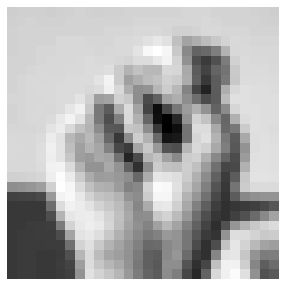

In [25]:
# Example usage:

# Randomly sample an index from x_train
rnd_idx = np.random.randint(len(y_test))

# Correct indexing for y_train
print(f'La imagen muestreada representa un: {y_test[rnd_idx,0]}')

# Plot corresponding image (x) for y in test dataset
plot_number(x_test_original[rnd_idx])

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [26]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    Input: x
    Input: y
    Output: 
    '''
    # Ensure that the number of samples in x and y are equal
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    
    total_data = x.shape[0] # Get the total number of samples
    if shuffle:
        # Generate an array of indices and shuffle them to randomize the order of samples
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        
        # Reorder x and y according to the shuffled indices
        x = x[idxs]
        y = y[idxs]
    
    # Return a generator that splits the data into minibatches of size `mb_size`
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

In [27]:
# Definición de una nueva clase llamada np_tensor, que hereda de la clase np.ndarray (la clase base de arrays en NumPy).
class np_tensor(np.ndarray): 
    # pass es una palabra clave en Python que indica que no se define ningún método o funcionalidad adicional.
    # Esto significa que la clase np_tensor, por ahora, no añade nada nuevo a np.ndarray, 
    # simplemente hereda todas las propiedades y comportamientos de np.ndarray sin modificaciones.
    pass

###  Clase Linear

In [28]:
class Linear():
    # El constructor inicializa la capa lineal con los tamaños de entrada y salida.
    # input_size: el número de características de entrada (dimensionalidad del vector de entrada).
    # output_size: el número de neuronas o salidas de la capa.
    def __init__(self, input_size, output_size):
        '''
        Inicializa los parámetros de la capa utilizando la inicialización de Kaiming He.
        '''
        # self.W es la matriz de pesos de la capa, de tamaño (output_size, input_size).
        # Se inicializa con una distribución normal (randn) escalada por 1/√(input_size/2) 
        # para mantener una propagación estable de los gradientes.
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)

        # self.b es el vector de bias (sesgo) de la capa, de tamaño (output_size, 1).
        # Inicializado con ceros.
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    # Definimos el método forward, que es llamado automáticamente al utilizar la instancia de la clase
    # como una función (por eso se usa __call__).
    # X: la entrada a la capa, de tamaño (input_size, batch_size).
    def __call__(self, X): 
        # Calculamos la salida de la capa, Z, aplicando la transformación lineal Z = W @ X + b.
        # @ es la operación de multiplicación de matrices en Python.
        # W es de tamaño (output_size, input_size) y X es de tamaño (input_size, batch_size),
        # lo que da como resultado Z de tamaño (output_size, batch_size).
        Z = self.W @ X + self.b
        return Z  # Retorna la salida Z

    # Definimos el método backward para realizar la retropropagación y calcular los gradientes.
    # X: la entrada original a la capa.
    # Z: la salida de la capa después de aplicar la transformación lineal.
    def backward(self, X, Z):
        # Calculamos el gradiente de la entrada (X.grad), propagando el gradiente hacia atrás.
        # El gradiente con respecto a X es W.T (la transpuesta de W) multiplicado por Z.grad
        # (el gradiente de la pérdida con respecto a la salida Z).
        X.grad = self.W.T @ Z.grad

        # Calculamos el gradiente con respecto a los pesos (self.W.grad).
        # El gradiente de los pesos es Z.grad multiplicado por la transpuesta de X.
        self.W.grad = Z.grad @ X.T

        # Calculamos el gradiente con respecto al bias (self.b.grad).
        # Sumamos Z.grad sobre el eje 1 (es decir, sobre el batch) para obtener el gradiente del bias.
        # El parámetro keepdims=True mantiene la dimensión del resultado para que coincida con self.b.
        self.b.grad = np.sum(Z.grad, axis=1, keepdims=True)

### Clase ReLU

In [29]:
class ReLU():
    
    # Este método especial '__call__' permite que una instancia de la clase sea llamada como una función.
    # Z: La entrada a la función de activación (puede ser un array de NumPy).
    def __call__(self, Z):
        # La función ReLU devuelve el valor máximo entre 0 y cada elemento de Z.
        # Si un elemento en Z es negativo, la salida será 0; si es positivo, la salida será el valor del elemento.
        return np.maximum(0, Z)

    # Este método 'backward' implementa la retropropagación para la función ReLU.
    # Z: La entrada original a la función de activación.
    # A: La salida de la función de activación (después de aplicar ReLU en el forward pass).
    def backward(self, Z, A):
        # Inicializamos el gradiente de Z con una copia del gradiente de A.
        Z.grad = A.grad.copy()

        # En la retropropagación, los gradientes a través de la función ReLU solo pasan
        # si la entrada original Z es mayor que 0. Si Z es menor o igual a 0, se hace cero el gradiente.
        Z.grad[Z <= 0] = 0

### Clase Sequential

In [30]:
# Definición de una clase llamada Sequential_layers que permite crear y manejar un modelo secuencial de capas.
# Este tipo de modelo se utiliza frecuentemente en redes neuronales, donde las capas se apilan de manera secuencial
# y cada capa toma la salida de la anterior como su entrada.
class Sequential_layers():
    
    # Constructor de la clase, inicializa el modelo secuencial con una lista de capas.
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        # Almacenamos la lista de capas que se pasarán al modelo.
        self.layers = layers
        # Variable que contendrá la entrada inicial del modelo (el input 'X').
        self.x = None
        # Diccionario que almacenará las salidas intermedias (outputs) de cada capa.
        # Esto es útil para realizar la retropropagación ya que necesitamos las salidas de cada capa.
        self.outputs = {}

    # Este método __call__ implementa la propagación hacia adelante (forward pass).
    # Permite que la clase pueda ser llamada como una función: model(input) es equivalente a model.__call__(input).
    def __call__(self, X):
        # Almacenamos la entrada original en self.x. Esto es útil para saber qué input se ha pasado.
        self.x = X 
        
        # Guardamos la entrada inicial en el diccionario outputs bajo la clave 'l0', ya que esto representa la capa de entrada.
        # Cada clave en el diccionario corresponderá a una capa (l1, l2, l3, etc.) y su salida.
        self.outputs['l0'] = self.x
        
        # Iteramos sobre cada capa en la lista self.layers.
        # Enumeramos las capas para tener un índice (i), que comienza en 1.
        # El índice es útil para rastrear las salidas de cada capa y guardarlas en el diccionario outputs.
        for i, layer in enumerate(self.layers, 1):
            # Actualizamos self.x al pasar la entrada por la capa actual.
            # La salida de cada capa se convierte en la entrada de la siguiente capa.
            self.x = layer(self.x)
            
            # Guardamos la salida de la capa actual en el diccionario outputs bajo la clave 'l{i}'.
            # Esto es necesario para la retropropagación, ya que las salidas intermedias se utilizan para calcular los gradientes.
            self.outputs['l'+str(i)] = self.x
        
        # Al final, devolvemos la salida final del modelo después de haber pasado por todas las capas.
        return self.x
    
    # Método backward implementa la retropropagación para calcular los gradientes de todas las capas.
    # Utiliza las salidas almacenadas en self.outputs para calcular los gradientes de cada capa en orden inverso.
    def backward(self):
        # Recorremos las capas en orden inverso (de la última a la primera) usando reversed().
        # La retropropagación necesita empezar desde la salida final y moverse hacia la entrada.
        for i in reversed(range(len(self.layers))):
            # Llamamos al método backward de cada capa.
            # Para cada capa, pasamos la salida de la capa actual (outputs['l{i}']) y la salida de la siguiente capa (outputs['l{i+1}']).
            # Estos valores son necesarios para calcular los gradientes correctos.
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    
    # Método update actualiza los parámetros (pesos y bias) de las capas lineales después de la retropropagación.
    # La tasa de aprendizaje (learning_rate) controla la magnitud de los cambios realizados en los parámetros.
    def update(self, learning_rate=1e-3):
        # Recorremos todas las capas en el modelo secuencial.
        for layer in self.layers:
            # Verificamos si la capa actual es de tipo ReLU.
            # Si la capa es ReLU, no hacemos ninguna actualización porque ReLU no tiene parámetros (ni pesos ni bias).
            if isinstance(layer, ReLU):
                continue  # Pasamos a la siguiente iteración si es ReLU ya que es la función escalon.
            
            # Si la capa es de tipo Linear, actualizamos los pesos (W) y los bias (b).
            # La actualización de los pesos se hace restando el gradiente multiplicado por la tasa de aprendizaje.
            # Esto sigue el algoritmo de gradiente descendente.
            layer.W = layer.W - learning_rate * layer.W.grad
            
            # Lo mismo se aplica al bias. Restamos el gradiente del bias multiplicado por la tasa de aprendizaje.
            layer.b = layer.b - learning_rate * layer.b.grad
    
    # Método predict realiza una predicción usando el modelo secuencial.
    # Toma como entrada X y pasa la entrada a través del forward pass (propagación hacia adelante).
    def predict(self, X):
        # Realizamos un forward pass llamando al modelo con la entrada X.
        output = self.__call__(X)
        
        # Usamos np.argmax para seleccionar el índice de la clase con mayor valor en la salida.
        # np.argmax devuelve el índice del valor más alto, lo cual es útil para tareas de clasificación.
        # Esto asume que la última capa del modelo es una capa de salida de clasificación, como softmax.
        return np.argmax(output)

### Cost Function

In [31]:
def softmaxXEntropy(x, y):
    # x - matriz de predicciones de la red neuronal (salidas de la última capa), de tamaño (n_clases, batch_size)
    # y - etiquetas verdaderas (ground truth), vector de tamaño (batch_size)
    
    # Calculamos el tamaño del batch, es decir, cuántos ejemplos se están procesando en esta pasada
    batch_size = x.shape[1]
    
    # Calculamos las puntuaciones exponenciales de las predicciones.
    # Esto es parte del proceso para calcular el softmax, que convierte las puntuaciones en probabilidades.
    exp_scores = np.exp(x)
    
    # Dividimos las puntuaciones exponenciales por la suma de todas las puntuaciones por cada ejemplo en el batch.
    # Esto asegura que las probabilidades en cada columna (para cada ejemplo) sumen 1.
    probs = exp_scores / exp_scores.sum(axis=0)
    
    # Hacemos una copia de las probabilidades para devolverlas más tarde como las predicciones.
    preds = probs.copy()
    
    # Costo:
    # Seleccionamos las probabilidades correspondientes a las clases verdaderas usando las etiquetas 'y'.
    # Esto nos da las probabilidades predichas para la clase correcta en cada ejemplo del batch.
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    
    # Calculamos la función de costo utilizando la entropía cruzada.
    # Tomamos el logaritmo de las probabilidades predichas para las clases correctas, lo negamos y lo sumamos.
    # Luego promediamos el costo dividiendo por el tamaño del batch.
    cost = np.sum(-np.log(y_hat)) / batch_size
    
    # Calcular los gradientes:
    # Restamos 1 de las probabilidades predichas para las clases correctas en cada ejemplo.
    # Esto es el gradiente de la función de costo con respecto a las entradas de softmax (dl/dx).
    probs[y.squeeze(), np.arange(batch_size)] -= 1
    
    # Almacenamos los gradientes en 'x.grad', que será utilizado en la retropropagación.
    x.grad = probs.copy()
    
    # Devolvemos las predicciones (probs) y el costo calculado.
    return preds, cost

### Loop de entrenamiento

In [32]:
# Función para entrenar un modelo utilizando gradiente descendente.
# model: El modelo que se va a entrenar (por ejemplo, un modelo secuencial de capas).
# epochs: El número de épocas, que es el número de veces que todo el conjunto de datos se pasa por la red.
# mb_size: El tamaño del minibatch, que es el número de ejemplos que se procesan juntos en cada paso de entrenamiento (por defecto 128).
# learning_rate: La tasa de aprendizaje, que controla el tamaño de los pasos de actualización de los parámetros del modelo (por defecto 1e-3).
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    
    # Bucle que itera sobre cada época de entrenamiento.
    # En cada época, el modelo ve todo el conjunto de datos una vez.
    for epoch in range(epochs):
        
        # Para cada minibatch de datos (x, y), se generan minibatches utilizando la función 'create_minibatches'.
        # 'x_train' son los datos de entrenamiento y 'y_train' son las etiquetas de entrenamiento.
        # Enumeramos los minibatches, lo que proporciona un índice i para cada minibatch.
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            
            # Realizamos la propagación hacia adelante (forward pass) a través del modelo con los datos de entrada 'x'.
            # x.T transpone el lote de datos para que las dimensiones sean correctas.
            # view(np_tensor) convierte el lote en un tensor de tipo np_tensor.
            scores = model(x.T.view(np_tensor))
            
            # Calculamos el costo y las predicciones utilizando softmax con entropía cruzada.
            # 'scores' son las salidas del modelo, y 'y' son las etiquetas verdaderas.
            _, cost = softmaxXEntropy(scores, y)
            
            # Realizamos la retropropagación (backward pass) para calcular los gradientes de los parámetros del modelo.
            model.backward()
            
            # Actualizamos los parámetros del modelo (pesos y bias) utilizando el gradiente calculado y la tasa de aprendizaje.
            model.update(learning_rate)
        
        # Después de procesar todos los minibatches en una época, imprimimos el costo final y la precisión (accuracy).
        # 'accuracy' es una función que calcula la precisión en un conjunto de validación (x_val, y_val).
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

In [33]:
# Función para calcular la precisión (accuracy) del modelo sobre un conjunto de datos.
# La precisión se define como el porcentaje de predicciones correctas que el modelo hace en comparación con las etiquetas verdaderas.
# x: Los datos de entrada (por ejemplo, imágenes, texto, etc.)
# y: Las etiquetas verdaderas correspondientes a los datos (clases correctas).
# mb_size: El tamaño de minibatch para dividir los datos y procesarlos en partes más pequeñas.
def accuracy(x, y, mb_size):
    
    # Inicializamos las variables 'correct' y 'total'.
    # 'correct' contará cuántas predicciones fueron correctas.
    # 'total' contará el número total de ejemplos procesados.
    correct = 0
    total = 0
    
    # Iteramos sobre los minibatches creados a partir de los datos de entrada 'x' y las etiquetas 'y'.
    # 'create_minibatches' divide el conjunto de datos en minibatches de tamaño 'mb_size'.
    # El bucle itera sobre cada minibatch y lo pasa al modelo.
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        
        # Realizamos la predicción del modelo en los datos del minibatch actual.
        # 'x.T' transpone los datos del minibatch para asegurar que las dimensiones sean correctas.
        # 'view(np_tensor)' convierte el minibatch en un tensor del tipo 'np_tensor', para que el modelo pueda procesarlo.
        pred = model(x.T.view(np_tensor))
        
        # Calculamos cuántas de las predicciones fueron correctas.
        # 'np.argmax(pred, axis=0)' selecciona el índice de la clase con mayor probabilidad (la predicción del modelo).
        # 'y.squeeze()' elimina cualquier dimensión adicional en 'y' para asegurar que los tamaños coincidan.
        # 'np.sum(...)' suma el número de predicciones correctas (donde la predicción del modelo coincide con la etiqueta verdadera).
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        
        # Actualizamos el contador 'total' con el número de ejemplos en el minibatch actual.
        # 'pred.shape[1]' devuelve el tamaño del minibatch (número de ejemplos en este minibatch).
        total += pred.shape[1]
    
    # Retornamos la precisión (accuracy) calculada como la fracción de predicciones correctas sobre el número total de ejemplos.
    return correct / total

### Create your model and train it

#### Primera configuración

In [34]:
# Se define el modelo utilizando la clase Sequential_layers, que toma una lista de capas como entrada.
# En este caso, el modelo consiste en varias capas secuenciales:
# 1. Una capa lineal que transforma un vector de 784 dimensiones (por ejemplo, una imagen de 28x28 píxeles) a 200 dimensiones.
# 2. Una función de activación ReLU.
# 3. Otra capa lineal que transforma las 200 dimensiones a 200 dimensiones.
# 4. Otra función de activación ReLU.
# 5. Una capa final que transforma las 200 dimensiones a 10, que puede representar 10 clases para un problema de clasificación.
model = Sequential_layers([
    Linear(784, 512),  # Capa Lineal: 784 -> 512
    ReLU(),            # Función de activación ReLU
    Linear(512, 256),  # Capa Lineal: 512 -> 256
    ReLU(),            # Función de activación ReLU
    Linear(256, 128),  # Capa Lineal: 256 -> 128
    ReLU(),            # Función de activación ReLU
    Linear(128, 24)    # Capa de salida: 128 -> 24 (24 clases para las 24 letras del alfabeto ASL)
])
# Se define el tamaño del minibatch (mb_size).
# El minibatch es un subconjunto de los datos de entrenamiento que se procesan juntos en cada iteración.
# En este caso, se usarán minibatches de 512 ejemplos.
mb_size = 512

# Se define la tasa de aprendizaje (learning_rate), que controla el tamaño de los pasos
# que se toman al actualizar los parámetros del modelo (pesos y bias) durante el entrenamiento.
# En este caso, se ha establecido una tasa de aprendizaje muy pequeña, 1e-4 (0.0001), lo que significa que los ajustes serán pequeños.
learning_rate = 1e-4

# Se define el número de épocas (epochs), que es el número de veces que todo el conjunto de entrenamiento se pasa por el modelo.
# Aquí se ha definido que el modelo entrenará durante 20 épocas, lo que significa que verá los datos de entrenamiento 20 veces.
epochs = 30

In [35]:
# Se entrena el modelo
train(model, epochs, mb_size, learning_rate)

costo: 1.0391040070884532, accuracy: 0.5350069735006974
costo: 0.4226498644386189, accuracy: 0.6764295676429568
costo: 0.18377187937207515, accuracy: 0.7132496513249651
costo: 0.10816546040800562, accuracy: 0.7400278940027895
costo: 0.05900619699687712, accuracy: 0.7525801952580196
costo: 0.0463853850281025, accuracy: 0.7587168758716876
costo: 0.04023709356453927, accuracy: 0.7634588563458856
costo: 0.029482401773780576, accuracy: 0.7656903765690377
costo: 0.02315452132160348, accuracy: 0.7693165969316597
costo: 0.01749915247634291, accuracy: 0.7718270571827057
costo: 0.015540173347032499, accuracy: 0.7748953974895397
costo: 0.012719525753311338, accuracy: 0.7737796373779637
costo: 0.013244609119418795, accuracy: 0.7785216178521618
costo: 0.010937755924509962, accuracy: 0.7799163179916317
costo: 0.012455362351002003, accuracy: 0.7807531380753138
costo: 0.00968133292734466, accuracy: 0.7818688981868899
costo: 0.007660244160856901, accuracy: 0.7810320781032078
costo: 0.00861888160300878,

In [36]:
# Accuracy del modelo
print(accuracy(x_test, y_test, mb_size))

0.7839420128240869


#### Segunda configuración

In [37]:
# Se define el modelo utilizando la clase Sequential_layers, que toma una lista de capas como entrada.
# En este caso, el modelo consiste en varias capas secuenciales:
# 1. Una capa lineal que transforma un vector de 784 dimensiones (por ejemplo, una imagen de 28x28 píxeles) a 200 dimensiones.
# 2. Una función de activación ReLU.
# 3. Otra capa lineal que transforma las 200 dimensiones a 200 dimensiones.
# 4. Otra función de activación ReLU.
# 5. Una capa final que transforma las 200 dimensiones a 10, que puede representar 10 clases para un problema de clasificación.
model_2 = Sequential_layers([
    Linear(784, 200),  # Capa Lineal: 784 -> 200
    ReLU(),            # Función de activación ReLU
    Linear(200,200),  # Capa Lineal: 200 -> 200
    ReLU(),            # Función de activación ReLU
    Linear(200, 24)    # Capa de salida: 200 -> 24 (24 clases para las 24 letras del alfabeto ASL)
])
# Se define el tamaño del minibatch (mb_size).
# El minibatch es un subconjunto de los datos de entrenamiento que se procesan juntos en cada iteración.
# En este caso, se usarán minibatches de 128 ejemplos.
mb_size_2 = 128

# Se define la tasa de aprendizaje (learning_rate), que controla el tamaño de los pasos
# que se toman al actualizar los parámetros del modelo (pesos y bias) durante el entrenamiento.
# En este caso, se ha establecido una tasa de aprendizaje muy pequeña, 3e-3 (0.003), lo que significa que los ajustes serán pequeños.
learning_rate_2 = 3e-3

# Se define el número de épocas (epochs), que es el número de veces que todo el conjunto de entrenamiento se pasa por el modelo.
# Aquí se ha definido que el modelo entrenará durante 30 épocas, lo que significa que verá los datos de entrenamiento 20 veces.
epochs_2 = 30

In [38]:
# Se entrena el modelo
train(model_2, epochs_2, mb_size_2, learning_rate_2)

costo: 0.010807852895519523, accuracy: 0.7885634588563459
costo: 0.003006304250405289, accuracy: 0.7885634588563459
costo: 0.0021557037576543847, accuracy: 0.7885634588563459
costo: 0.001331516363639432, accuracy: 0.7885634588563459
costo: 0.0014983691396088003, accuracy: 0.7885634588563459
costo: 0.0009926449510923856, accuracy: 0.7885634588563459
costo: 0.00035961372555278067, accuracy: 0.7885634588563459
costo: 0.0006989829598673722, accuracy: 0.7885634588563459
costo: 0.0004753038175633592, accuracy: 0.7885634588563459
costo: 0.0005263885251621068, accuracy: 0.7885634588563459
costo: 0.00046293342932331454, accuracy: 0.7885634588563459
costo: 0.000407951669291133, accuracy: 0.7885634588563459
costo: 0.00044377328061292527, accuracy: 0.7885634588563459
costo: 0.00026118037010673114, accuracy: 0.7885634588563459
costo: 0.00028317392215635134, accuracy: 0.7885634588563459
costo: 0.00014828286043688232, accuracy: 0.7885634588563459
costo: 0.0002937856252066253, accuracy: 0.788563458856

In [39]:
# Accuracy del modelo
print(accuracy(x_test, y_test, mb_size_2))

0.7839420128240869


Because its accuracy is better, we choose model 2

### Test your model on Random data from your test set

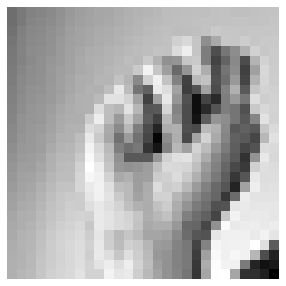

El valor predicho es: n, el valor real es:n


In [43]:
# First trial
idx = np.random.randint(len(y_test))
plot_number(x_test[idx])
pred = model_2.predict(x_test[idx].reshape(-1, 1))
print(f'El valor predicho es: {alphabet[pred]}, el valor real es:{alphabet[y_test[idx].tolist()[0]]}')

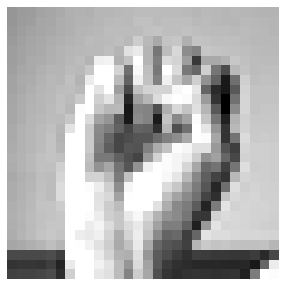

El valor predicho es: e, el valor real es:e


In [44]:
# Second trial
idx = np.random.randint(len(y_test))
plot_number(x_test[idx])
pred = model_2.predict(x_test[idx].reshape(-1, 1))
print(f'El valor predicho es: {alphabet[pred]}, el valor real es:{alphabet[y_test[idx].tolist()[0]]}')

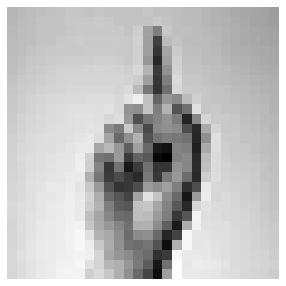

El valor predicho es: d, el valor real es:d


In [45]:
# Third trial
idx = np.random.randint(len(y_test))
plot_number(x_test[idx])
pred = model_2.predict(x_test[idx].reshape(-1, 1))
print(f'El valor predicho es: {alphabet[pred]}, el valor real es:{alphabet[y_test[idx].tolist()[0]]}')

### Conclusions

Hyperparameters in fully connected neural networks are critical as they directly influence the model’s performance, learning capacity, and generalization ability. These include learning rate, which controls how quickly the model adjusts weights; batch size, which impacts the stability and speed of training; and the number of hidden layers and neurons, which affect the model's complexity and ability to capture patterns. Proper tuning of these hyperparameters is essential for preventing underfitting, overfitting, and ensuring efficient training. Finding the optimal balance often requires experimentation and techniques like grid search, random search, or automated hyperparameter optimization.